## Cognitive Models for El Farol
---

In [1]:
import ElFarol as ef
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
import ast
from copy import deepcopy

#### Random Model

In [52]:
bar = ef.BarElFarol(num_agents=2, threshold=0.6, model='random')
DEB=False
num_it = 100
model = 'random'
parameters = [0.5]
for t in range(num_it) : 
    bar.compute_attendance()
    bar.compute_scores()
    if DEB :
        bar.print_round(t)
    bar.agents_decide(model=model, params=parameters, DEB=DEB)

<AxesSubplot:>

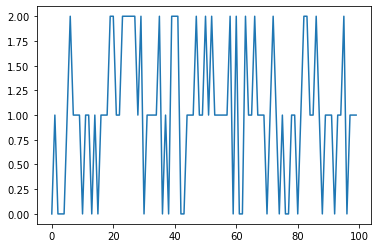

In [53]:
data = pd.DataFrame({'attendance': bar.history})
data['attendance'].plot()

In [54]:
data

,attendance
0,0
1,1
2,0
3,0
4,0
...,...
95,2
96,0
97,1
98,1


#### Bell et al. Model

In [55]:
model = 'belletal'
bar = ef.BarElFarol(num_agents=2, threshold=0.6, model=model)
DEB=False
num_it = 100
parameters = [0.9]
for t in range(num_it) : 
    bar.compute_attendance()
    bar.compute_scores()
    if DEB :
        bar.print_round(t)
    bar.agents_decide(model=model, params=parameters, DEB=DEB)

<AxesSubplot:>

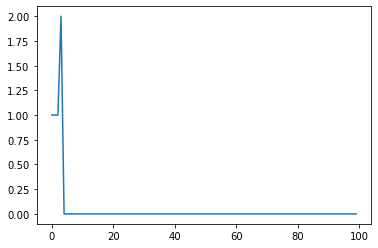

In [56]:
data_belletal = pd.DataFrame({'attendance': bar.history})
data_belletal['attendance'].plot()

In [65]:
datas = bar.save_pandas()
datas.head()

,round,agent,choice,score,probability
0,1,0,0,0,0.463598
1,2,0,0,0,0.463598
2,3,0,1,1,0.463598
3,4,0,1,-1,0.643598
4,5,0,0,0,0.000000


<AxesSubplot:xlabel='round', ylabel='probability'>

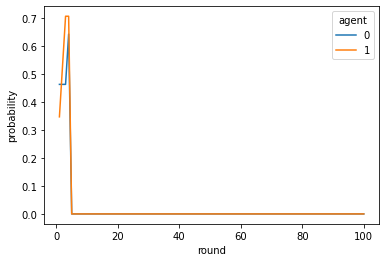

In [66]:
sns.lineplot(x='round', y='probability', data=datas, hue='agent')

In [90]:
def get_partner_choice(x):
    a = [i for i in x]
    a.reverse()
    return a

In [94]:
datas.sort_values(by=['agent','round'], inplace=True)
datas['choice_lag'] = datas.groupby(['agent'])['choice'].transform('shift', 1)
datas['choice_partner'] = datas.groupby(['round'])['choice'].transform(lambda x: get_partner_choice(x))
datas['choice_partner_lag'] = datas.groupby(['agent'])['choice_partner'].transform('shift', 1)

In [95]:
datas.sort_values(by=['round'])

,round,agent,choice,score,probability,choice_lag,choice_partner,choice_partner_lag
0,1,0,0,0,0.463598,NaN,1,NaN
100,1,1,1,1,0.347405,NaN,0,NaN
1,2,0,0,0,0.463598,0.0,1,1.0
101,2,1,1,1,0.527405,1.0,0,0.0
2,3,0,1,1,0.463598,0.0,0,1.0
...,...,...,...,...,...,...,...,...
97,98,0,0,0,0.000000,0.0,0,0.0
198,99,1,0,0,0.000000,0.0,0,0.0
98,99,0,0,0,0.000000,0.0,0,0.0
99,100,0,0,0,0.000000,0.0,0,0.0


In [96]:
datas.groupby(['choice_lag', 'choice_partner_lag'])['choice'].sum()

choice_lag  choice_partner_lag
0.0         0.0                   0
            1.0                   2
1.0         0.0                   2
            1.0                   0
Name: choice, dtype: int64

#### Win-Stay-Lose-Shift Model

In [ ]:
bar = ef.BarElFarol(num_agents=2, threshold=0.6, model='win-stay-lose-shift')
DEB=False
num_it = 50
model = 'win-stay-lose-shift'
parameters = [0.005]
for t in range(num_it) : 
    bar.compute_attendance()
    bar.compute_scores()
    if DEB :
        bar.print_round(t)
    bar.agents_decide(model=model, params=parameters, DEB=DEB)

In [ ]:
data = pd.DataFrame({'attendance': bar.history})

fig, ax = plt.subplots()
data['attendance'].plot()
ax.axhline(60, ls='--', color='red')

In [ ]:
datas = bar.save_pandas()
datas.head()

In [ ]:
sns.lineplot(x='round', y='probability', data=datas, hue='agent')

#### P-self

In [ ]:
bar = ef.BarElFarol(num_agents=2, threshold=0.6, model='p-self')
DEB=False
num_it = 50
model = 'p-self'
parameters = [0.6, 0.9]
for t in range(num_it) : 
    bar.compute_attendance()
    bar.compute_scores()
    if DEB :
        bar.print_round(t)
    bar.agents_decide(model=model, params=parameters, DEB=DEB)

In [ ]:
data = pd.DataFrame({'attendance': bar.history})

fig, ax = plt.subplots()
sns.lineplot(data=data['attendance'], ax=ax)
#ax.axhline(60, ls='--', color='red')

In [ ]:
datas = bar.save_pandas()
datas.head()

In [ ]:
sns.lineplot(x='round', y='probability', data=datas, hue='agent')

#### P-partner

In [34]:
import ElFarol as ef
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
import ast
from copy import deepcopy

In [35]:
bar = ef.BarElFarol(num_agents=2, threshold=0.6, model='p-partner')
DEB=True
num_it = 50
model = 'p-partner'
parameters = [0, 1]
for t in range(num_it) : 
    bar.compute_attendance()
    bar.compute_scores()
    if DEB :
        bar.print_round(t)
    bar.agents_decide(model=model, params=parameters, DEB=DEB)

Round: 0 || Attendance: 2
State:1, Score:-1, Attendance probability:0.3041060941702747
State:1, Score:-1, Attendance probability:0.31162144050572316
Round: 1 || Attendance: 0
State:0, Score:0, Attendance probability:0
State:0, Score:0, Attendance probability:0
Round: 2 || Attendance: 2
State:1, Score:-1, Attendance probability:1
State:1, Score:-1, Attendance probability:1
Round: 3 || Attendance: 0
State:0, Score:0, Attendance probability:0
State:0, Score:0, Attendance probability:0
Round: 4 || Attendance: 2
State:1, Score:-1, Attendance probability:1
State:1, Score:-1, Attendance probability:1
Round: 5 || Attendance: 0
State:0, Score:0, Attendance probability:0
State:0, Score:0, Attendance probability:0
Round: 6 || Attendance: 2
State:1, Score:-1, Attendance probability:1
State:1, Score:-1, Attendance probability:1
Round: 7 || Attendance: 0
State:0, Score:0, Attendance probability:0
State:0, Score:0, Attendance probability:0
Round: 8 || Attendance: 2
State:1, Score:-1, Attendance proba

<AxesSubplot:ylabel='attendance'>

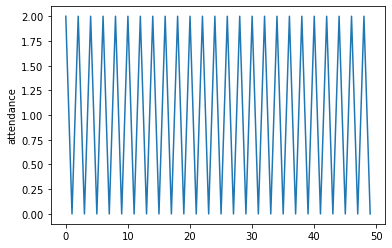

In [36]:
data = pd.DataFrame({'attendance': bar.history})

fig, ax = plt.subplots()
sns.lineplot(data=data['attendance'], ax=ax)
#ax.axhline(60, ls='--', color='red')

In [37]:
datas = bar.save_pandas()
datas.sort_values(by=['round', 'agent'])

,round,agent,choice,score,probability
0,1,0,1,-1,0.304106
50,1,1,1,-1,0.311621
1,2,0,0,0,0.000000
51,2,1,0,0,0.000000
2,3,0,1,-1,1.000000
...,...,...,...,...,...
97,48,1,0,0,0.000000
48,49,0,1,-1,1.000000
98,49,1,1,-1,1.000000
49,50,0,0,0,0.000000


<AxesSubplot:xlabel='round', ylabel='probability'>

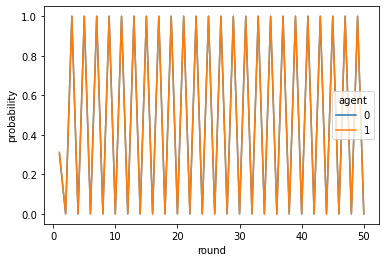

In [38]:
sns.lineplot(x='round', y='probability', data=datas, hue='agent')

#### P-mixed

In [46]:
bar = ef.BarElFarol(num_agents=2, threshold=0.6, model='p-mixed')
DEB=False
num_it = 50
model = 'p-mixed'
parameters = [0.1, 0.1,0.9,0.9]
for t in range(num_it) : 
    bar.compute_attendance()
    bar.compute_scores()
    if DEB :
        bar.print_round(t)
    bar.agents_decide(model=model, params=parameters, DEB=DEB)

<AxesSubplot:ylabel='attendance'>

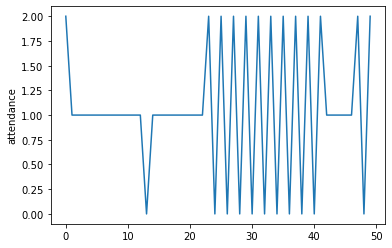

In [47]:
data = pd.DataFrame({'attendance': bar.history})

fig, ax = plt.subplots()
sns.lineplot(data=data['attendance'], ax=ax)
#ax.axhline(60, ls='--', color='red')

In [48]:
datas = bar.save_pandas()
datas.sort_values(by='round')

,round,agent,choice,score,probability
0,1,0,1,-1,0.962843
50,1,1,1,-1,0.804588
1,2,0,0,0,0.100000
51,2,1,1,1,0.100000
2,3,0,0,0,0.100000
...,...,...,...,...,...
47,48,0,1,-1,0.100000
98,49,1,0,0,0.100000
48,49,0,0,0,0.100000
49,50,0,1,-1,0.900000


<AxesSubplot:xlabel='round', ylabel='probability'>

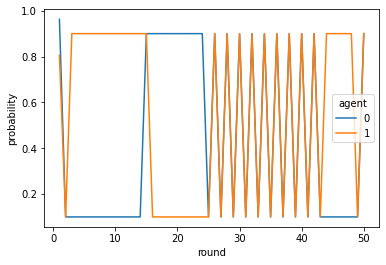

In [49]:
sns.lineplot(x='round', y='probability', data=datas, hue='agent')

In [50]:
def measurements(df):
    eff = df.score.mean()

    df['winner'] = df.groupby('round')['score'].transform(winner)
    
    if 'a' in df['winner'].unique():
        ro1_p = df['winner'].value_counts()['a']
    else: 
        ro1_p = 0
    
    if 'b' in df['winner'].unique():
        ro2_p = df['winner'].value_counts()['b']
    else: 
        ro2_p = 0
    fairness = min(ro1_p, ro2_p)/max(ro1_p, ro2_p)
    return (eff, fairness)

def winner(l):
    if np.argmax(l) == 0:
        return 'a'
    else:
        return 'b'

In [51]:
measurements(datas)

(0.0, 0.5151515151515151)